# Load Data

In [ ]:
import pandas as pd
import numpy as np

# Definisikan path file
path = '/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/Eksperimen - Klasifikasi Teks/'

data = pd.read_csv(path + 'datamodel_klasifikasi_clean.csv')
df = data.copy()

In [ ]:
df

,Answer,Year,Answer_fix,topik
0,Alo Anjali Terimakasih atas pertanyaannya Inso...,2019,"['insomnia', 'sakit', 'gejala', 'sakit', 'saki...",depresi
1,Selamat malam terima kasih telah bertanya di A...,2020,"['asa', 'debar', 'debar', 'irama', 'jantung', ...",stres
2,Alo Kak terima kasih telah bertanya pada Alodo...,2020,"['paham', 'asa', 'anak', 'tua', 'cerai', 'muda...",depresi
3,Selamat pagi Maria terima kasih telah bertanya...,2018,"['maria', 'prihatin', 'kondisi', 'alami', 'pen...",depresi
4,Alo Fitri Nurasiah Depresi merupakan suatu ben...,2020,"['depresi', 'bentuk', 'mental', 'perhati', 'ma...",depresi
...,...,...,...,...
3730,Halo Pandri Terima kasih telah bertanya di Alo...,2018,"['keluarga', 'tetangga', 'banting', 'pintu', '...",stres
3731,Alo Miftah Terima kasih atas pertanyaannya Set...,2020,"['takut', 'jarang', 'takut', 'kenal', 'fobia',...",cemas
3732,Alo thaniamulyadi Terima kasih atas pertanyaan...,2020,"['takut', 'sesuai', 'enak', 'erti', 'nyaman', ...",cemas
3733,Halo terimakasih atas pertanyaannya untuk Alod...,2020,"['tama', 'detail', 'periksa', 'periksa', 'renc...",stres


In [ ]:
df.topik.value_counts()

,count
topik,
depresi,1456
stres,1323
cemas,956


## Visualisasi

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.set()

### Diagram batang

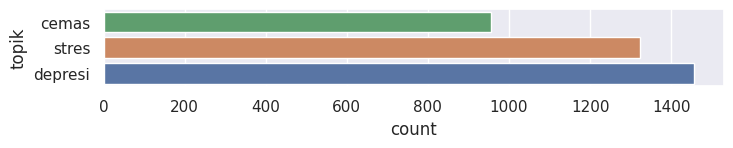

In [ ]:
# order article counts per topik and get the index
order = df.topik.value_counts(ascending=True).index

plt.figure(figsize=(8,1))
sns.countplot(y='topik', data=df, orient='h', order=order, hue='topik', legend=False);

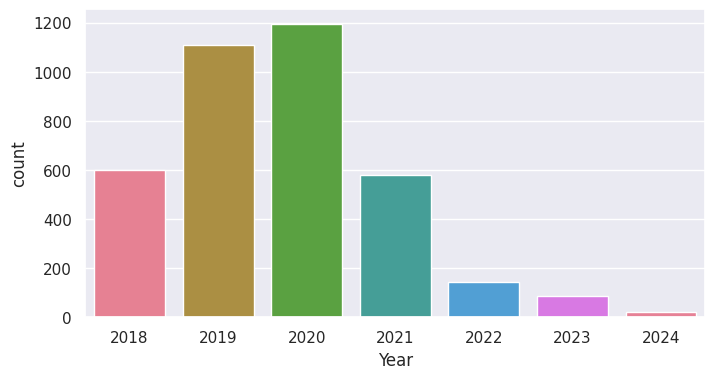

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=df, hue='Year', palette='husl', legend=False);

In [ ]:
pd.crosstab(df.topik, df.Year)

Year,2018,2019,2020,2021,2022,2023,2024
topik,,,,,,,
cemas,103,196,389,168,59,33,8
depresi,302,401,468,228,39,14,4
stres,195,511,338,185,44,39,11


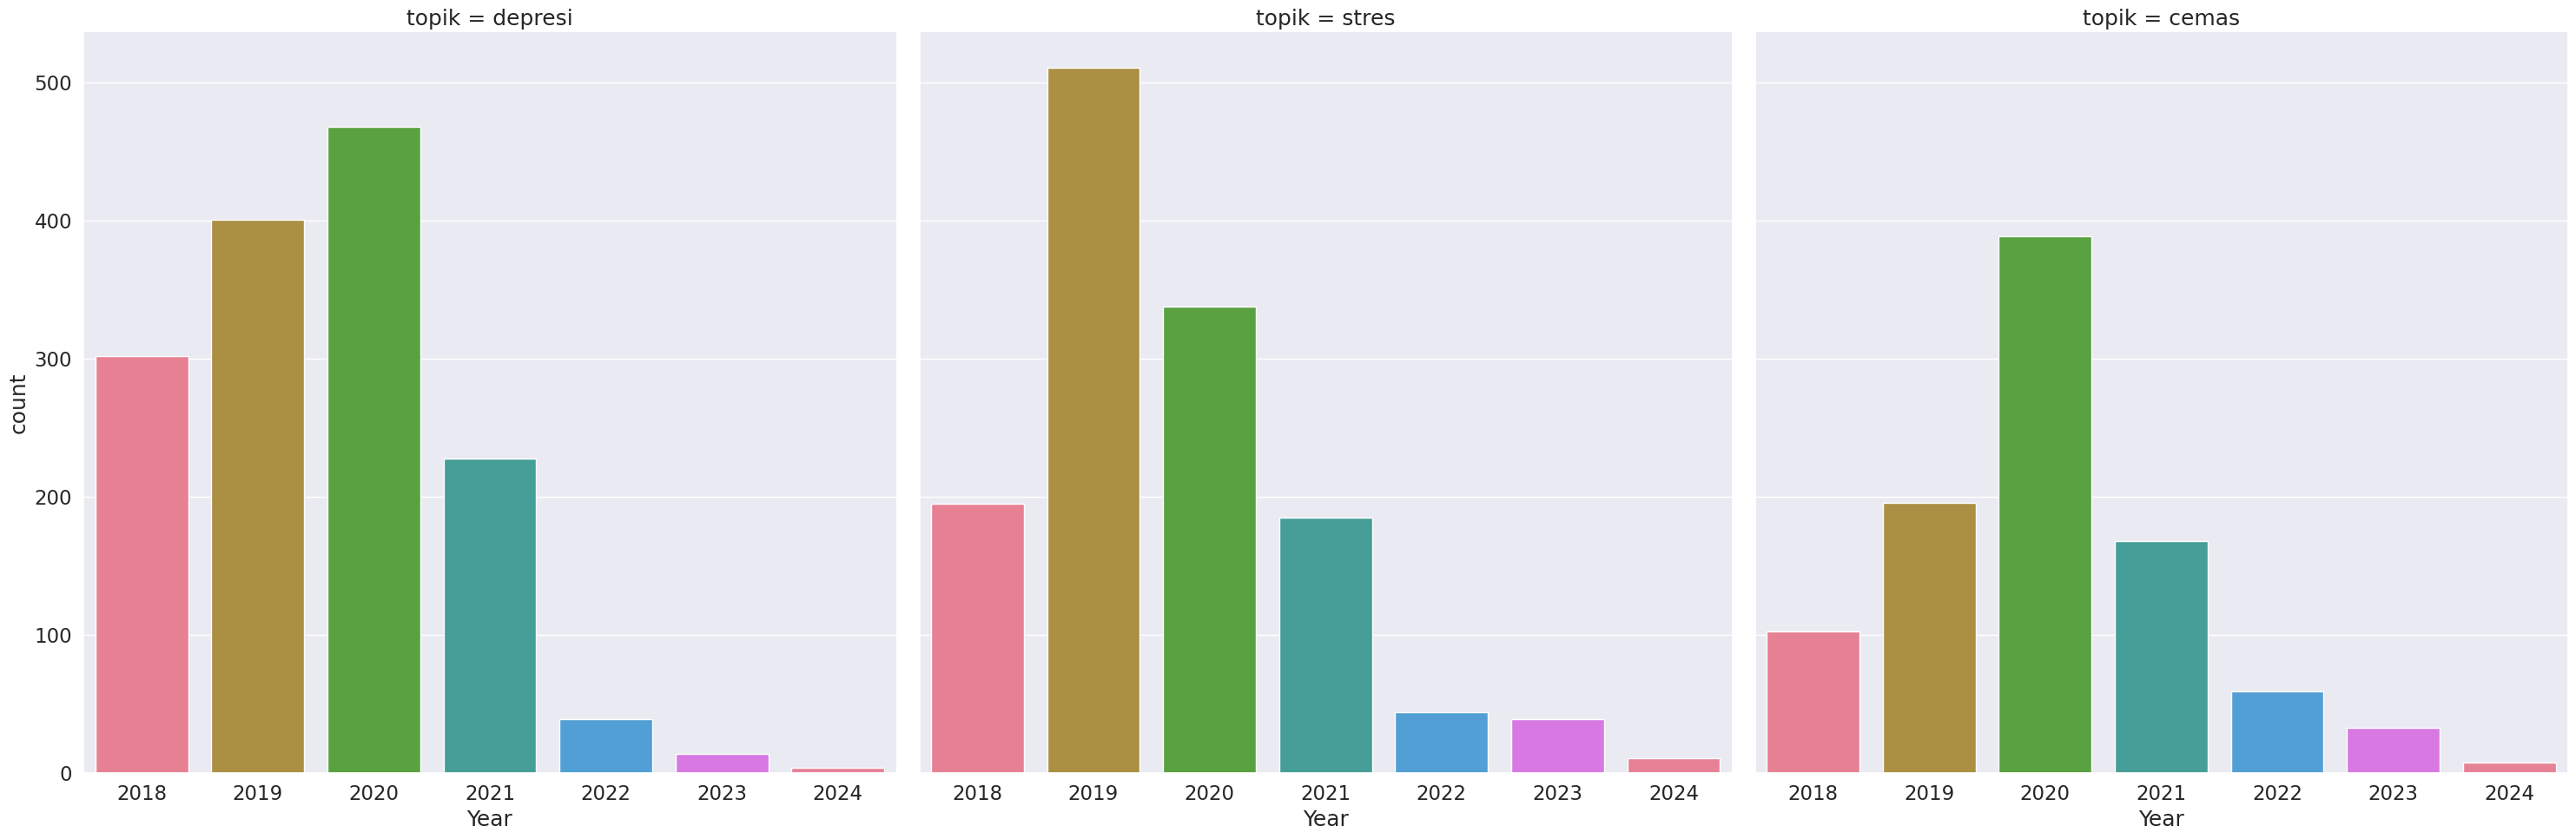

In [ ]:
sns.set(font_scale=1.5)
sns.catplot(data=df, x='Year', col="topik", col_wrap=3, sharex=False, height=10, kind='count', hue='Year', palette='husl', legend=False);

### Word Cloud

In [ ]:
# Pastikan kolom 'Answer_fix' berisi list token
df['Answer_fix'] = df['Answer_fix'].apply(eval)

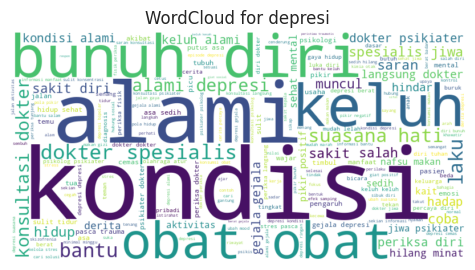

--------------------------------------------------


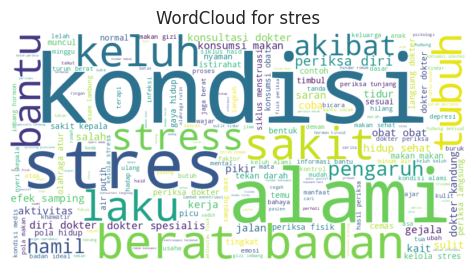

--------------------------------------------------


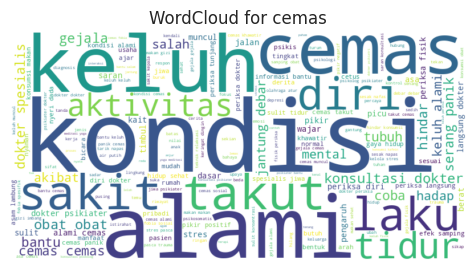

--------------------------------------------------


In [ ]:
# Mendapatkan daftar topik unik
topik_list = df['topik'].unique()

# Membuat WordCloud untuk setiap topik
for topik in topik_list:
    # Menggabungkan semua kata-kata dalam kolom Answer_fix untuk topik yang spesifik
    words = ' '.join([' '.join(words) for words in df[df['topik'] == topik]['Answer_fix']])

    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    # Menampilkan WordCloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {topik}', fontsize=12)
    plt.axis('off')
    plt.tight_layout(pad=3.0)
    plt.show()
    print("-"*50)

## Melakukan ekstraksi fitur

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Ekstraksi fitur menggunakan N-Gram pada data yang sudah ditokenisasi
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), tokenizer=lambda x: x, lowercase=False, max_features=100)
X_ngram = ngram_vectorizer.fit_transform(df['Answer_fix'])

# Setting data
nama_ekstraksi = 'X_ngram'
fitur = X_ngram
y = df['topik']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# import modul

In [ ]:
# Import libraries yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import json
import nltk

# Pastikan nltk sudah terinstall
nltk.download('punkt')

from sklearn.model_selection import cross_val_predict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Basic Split Validation Modelling (tanpa optimasi)

In [ ]:
# Define models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define split ratios
splits = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Initialize results dictionary
results = {}

for train_size, test_size in splits:
    print(f'Processing split {int(train_size*100)}:{int(test_size*100)}')

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(fitur, y, test_size=test_size, random_state=42)

    for model_name, model in models.items():
        print(f'  Training {model_name} (basic model)')

        # Train the model directly
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)

        # Convert tuple key to string
        result_key = f"{model_name}_basic_split {int(train_size*100)}:{int(test_size*100)}"

        # Save results
        results[result_key] = {
            'confusion_matrix': conf_matrix.tolist(),
            'classification_report': class_report,
            'accuracy': accuracy
        }

        print(f'    Accuracy: {accuracy:.4f}')
        print('    Classification Report:')
        print(classification_report(y_test, y_pred, zero_division=0))

# Save results to a JSON file
with open(path + f'{nama_ekstraksi}_basic_sv_experiment_results2.json', 'w') as f:
    json.dump(results, f, indent=4)

Processing split 60:40
  Training SVM (basic model)
    Accuracy: 0.8066
    Classification Report:
              precision    recall  f1-score   support

       cemas       0.84      0.73      0.78       397
     depresi       0.80      0.87      0.83       591
       stres       0.79      0.80      0.79       506

    accuracy                           0.81      1494
   macro avg       0.81      0.80      0.80      1494
weighted avg       0.81      0.81      0.81      1494

  Training Decision Tree (basic model)
    Accuracy: 0.7269
    Classification Report:
              precision    recall  f1-score   support

       cemas       0.69      0.69      0.69       397
     depresi       0.76      0.76      0.76       591
       stres       0.72      0.72      0.72       506

    accuracy                           0.73      1494
   macro avg       0.72      0.72      0.72      1494
weighted avg       0.73      0.73      0.73      1494

  Training Gradient Boosting (basic model)
    Accu

## Menampilkan hasil model

In [ ]:
import json

# Membaca file JSON
with open(path + f'{nama_ekstraksi}_basic_sv_experiment_results2.json', 'r') as f:
    results = json.load(f)

### Confusion Matrix (heatmap)

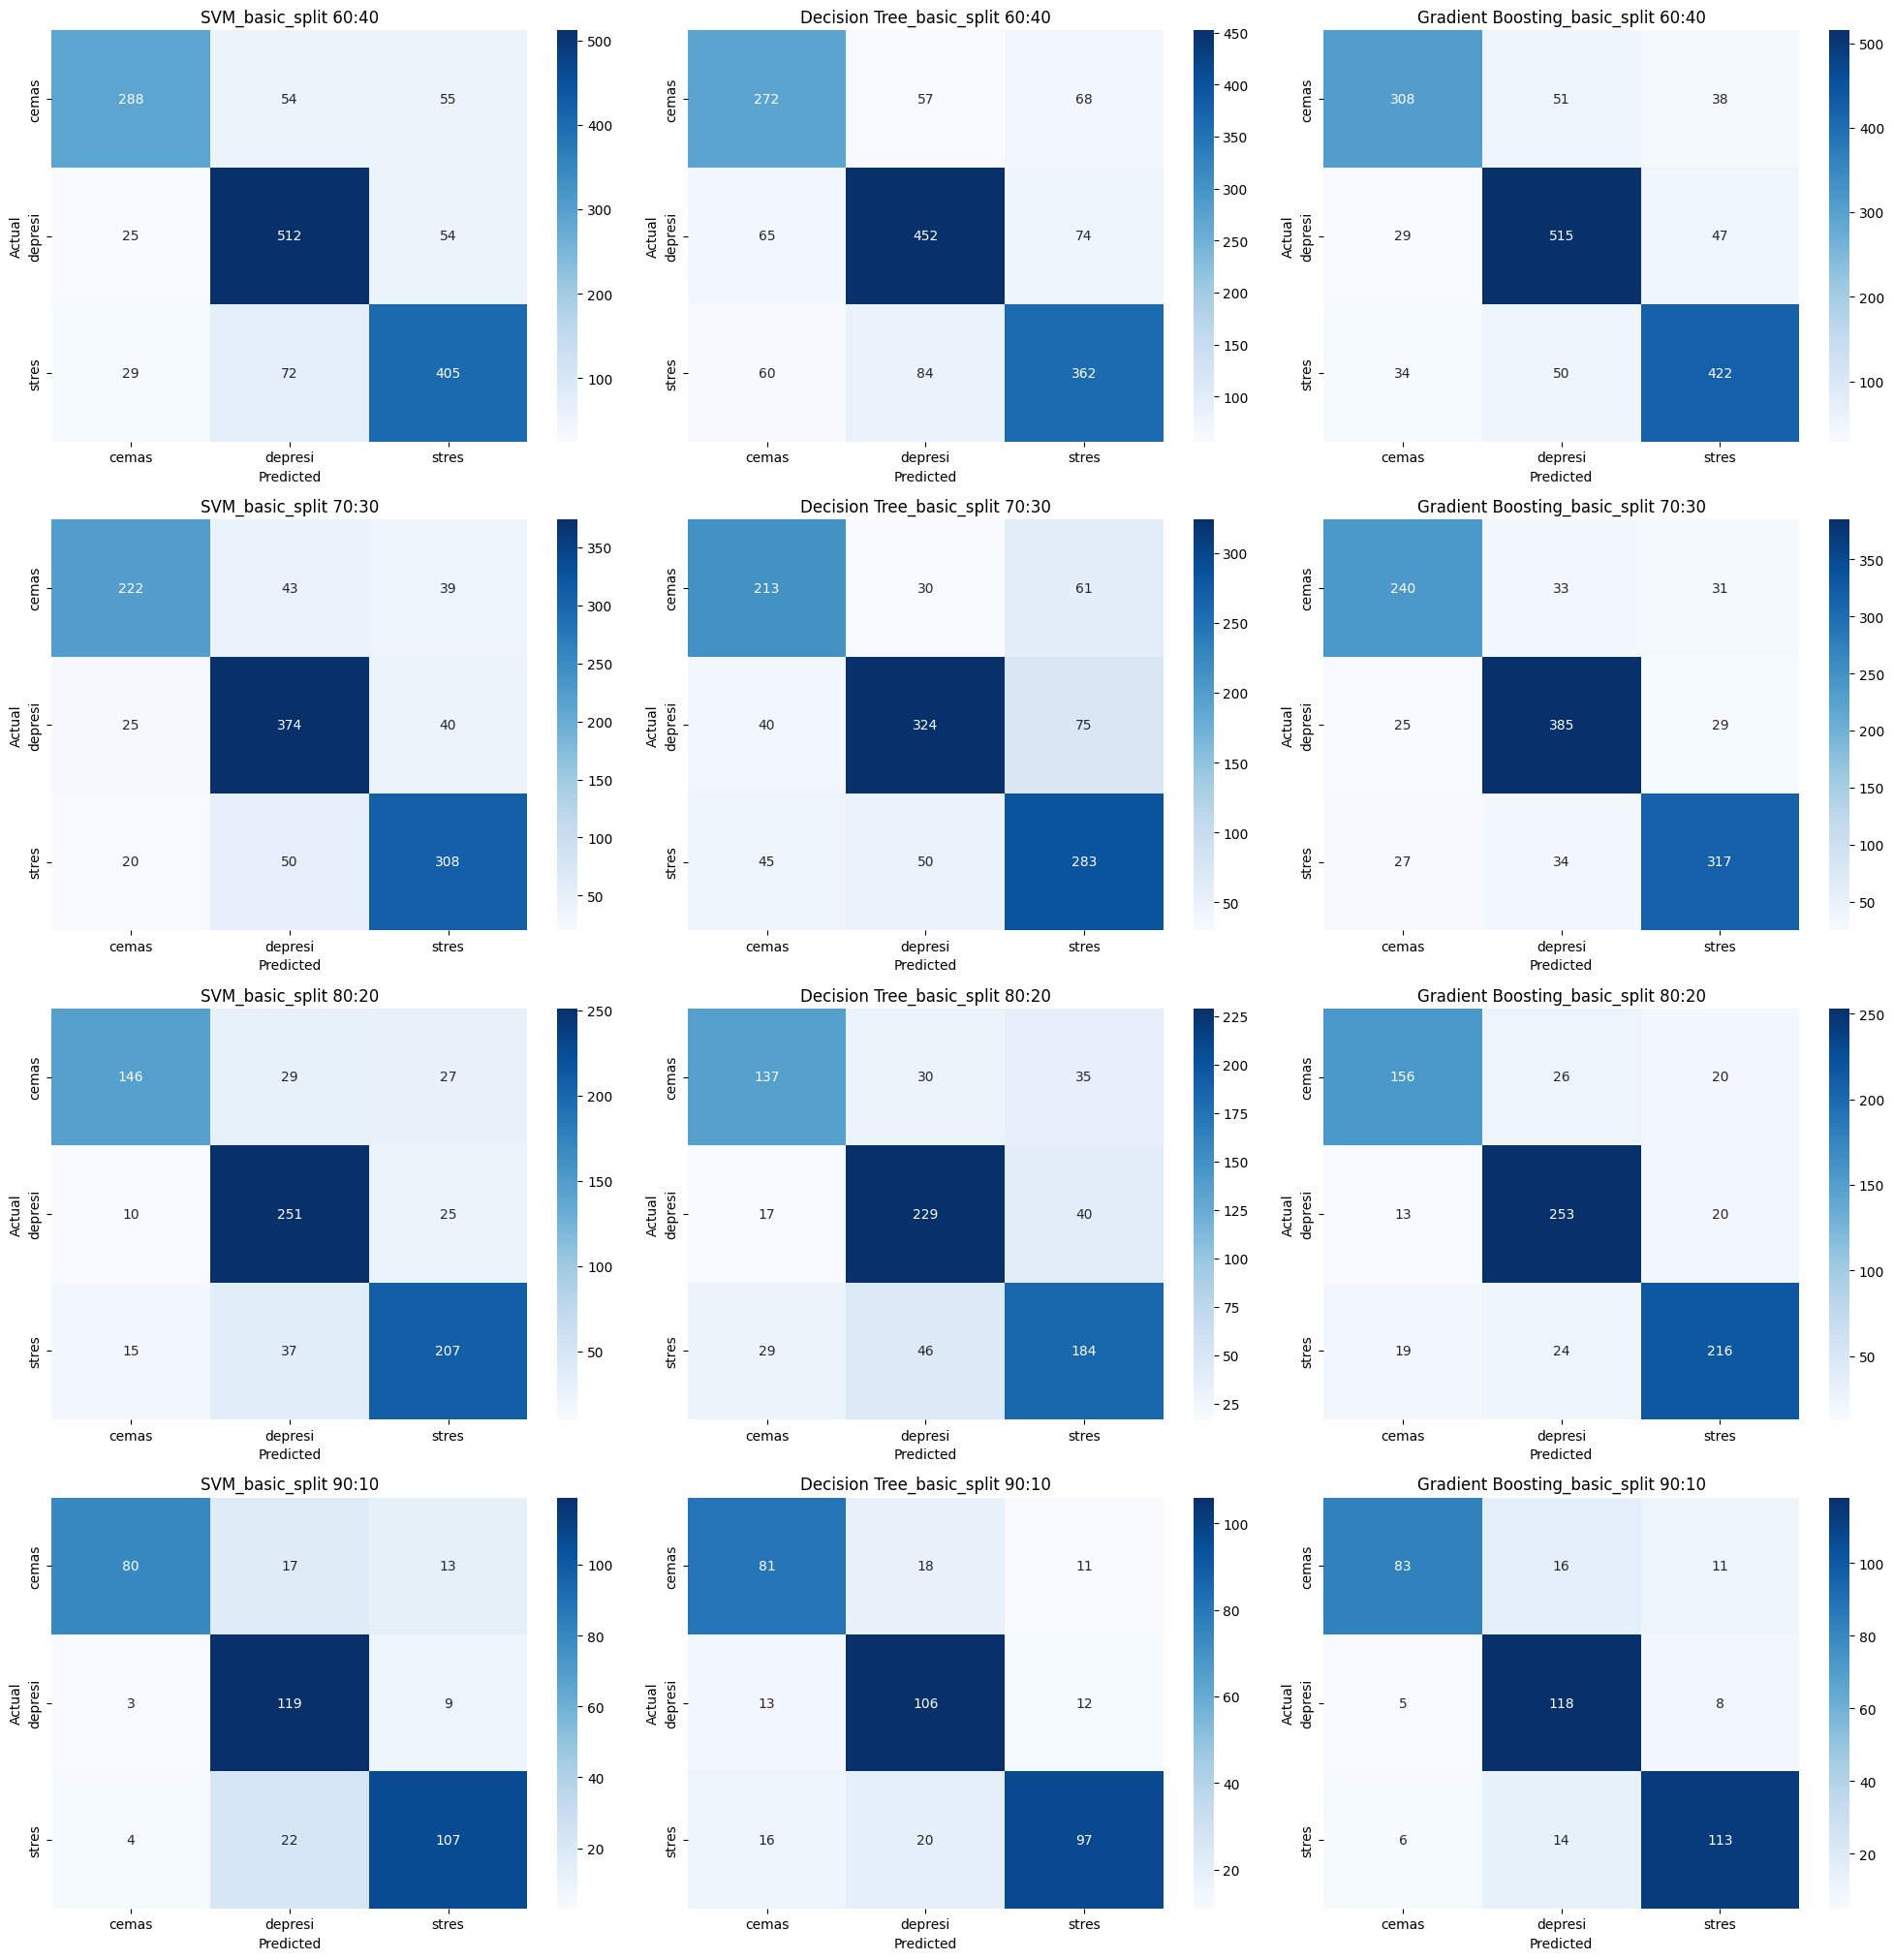

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Known labels
labels = ["cemas", "depresi", "stres"]

# Set the figure size
plt.rcParams['figure.figsize'] = [20, 30]

# Create subplots for each confusion matrix
for i, (key, value) in enumerate(results.items()):
    cm = np.array(value['confusion_matrix'])
    plt.subplot(6, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(key)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.axis("on")

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Known labels
labels = ["cemas", "depresi", "stres"]

# Initialize an empty DataFrame to store all confusion matrices
df_cm_combined = pd.DataFrame()

# Loop through each model and its confusion matrix in the results
for key, value in results.items():
    # Extract the confusion matrix
    cm = np.array(value['confusion_matrix'])

    # Create a DataFrame from the confusion matrix
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    # Insert the model name into the first column, with only the first row showing the model name
    df_cm.insert(0, 'Model', [key] + [''] * (len(labels) - 1))

    # Concatenate this confusion matrix DataFrame with the combined DataFrame
    df_cm_combined = pd.concat([df_cm_combined, df_cm])

# Display the combined DataFrame
df_cm_combined

,Model,cemas,depresi,stres
cemas,SVM_basic_split 60:40,288,54,55
depresi,,25,512,54
stres,,29,72,405
cemas,Decision Tree_basic_split 60:40,272,57,68
depresi,,65,452,74
stres,,60,84,362
cemas,Gradient Boosting_basic_split 60:40,308,51,38
depresi,,29,515,47
stres,,34,50,422
cemas,SVM_basic_split 70:30,222,43,39


### Evaluasi kinerja model

In [ ]:
# Inisialisasi list untuk menyimpan data
data = []

# Ekstrak split dan model dari keys di results
for key, value in results.items():
    model_name, split_info = key.split(f'_basic_split')
    split_ratio = split_info.replace('_test', ':')
    accuracy = value['accuracy']

    # Tambahkan data ke dalam list
    data.append([split_ratio, model_name, accuracy])

# Konversi list ke DataFrame
accuracy_table = pd.DataFrame(data, columns=['Split', 'Model', 'Accuracy'])

# Pivot DataFrame agar model menjadi kolom
accuracy_table = accuracy_table.pivot(index='Split', columns='Model', values='Accuracy')

# Atur ulang kolom sesuai urutan yang diinginkan
accuracy_table = accuracy_table[['SVM', 'Decision Tree', 'Gradient Boosting']]

# Tampilkan tabel akurasi
accuracy_table

Model,SVM,Decision Tree,Gradient Boosting
Split,,,
60:40,0.806560,0.726908,0.833333
70:30,0.806423,0.731490,0.840321
80:20,0.808568,0.736278,0.836680
90:10,0.818182,0.759358,0.839572


In [ ]:
# Initialize an empty list to store data for the DataFrame
data = []

# Extracting data for each model and split
for experiment_name, result in results.items():
    for label, metrics in result['classification_report'].items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip overall metrics
            row = {
                'Experiment': experiment_name,
                'Label': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            }
            data.append(row)

# Create DataFrame from the data list
df_results = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df_results

,Experiment,Label,Precision,Recall,F1-Score,Support
0,SVM_basic_split 60:40,cemas,0.842105,0.725441,0.779432,397.0
1,SVM_basic_split 60:40,depresi,0.802508,0.866328,0.833198,591.0
2,SVM_basic_split 60:40,stres,0.787938,0.800395,0.794118,506.0
3,Decision Tree_basic_split 60:40,cemas,0.685139,0.685139,0.685139,397.0
4,Decision Tree_basic_split 60:40,depresi,0.762226,0.764805,0.763514,591.0
5,Decision Tree_basic_split 60:40,stres,0.718254,0.715415,0.716832,506.0
6,Gradient Boosting_basic_split 60:40,cemas,0.830189,0.775819,0.802083,397.0
7,Gradient Boosting_basic_split 60:40,depresi,0.836039,0.871404,0.853355,591.0
8,Gradient Boosting_basic_split 60:40,stres,0.832347,0.833992,0.833169,506.0
9,SVM_basic_split 70:30,cemas,0.831461,0.730263,0.777583,304.0


In [ ]:
# Group by 'Experiment' and calculate the mean of only the numeric columns
df_overall_result = df_results.groupby('Experiment')[['Precision', 'Recall', 'F1-Score']].mean().reset_index()

# Display the overall result DataFrame
df_overall_result

,Experiment,Precision,Recall,F1-Score
0,Decision Tree_basic_split 60:40,0.721873,0.721786,0.721828
1,Decision Tree_basic_split 70:30,0.730721,0.729125,0.728829
2,Decision Tree_basic_split 80:20,0.736626,0.729781,0.732357
3,Decision Tree_basic_split 90:10,0.760269,0.758282,0.758024
4,Gradient Boosting_basic_split 60:40,0.832858,0.827072,0.829536
5,Gradient Boosting_basic_split 70:30,0.838179,0.835030,0.836434
6,Gradient Boosting_basic_split 80:20,0.836174,0.830290,0.832639
7,Gradient Boosting_basic_split 90:10,0.845446,0.834978,0.837478
8,SVM_basic_split 60:40,0.810850,0.797388,0.802249
9,SVM_basic_split 70:30,0.809394,0.799005,0.802806


## Simpan dataframe ke excell

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Initialize a Pandas Excel writer
excel_path = path + f'{nama_ekstraksi}_rekap_eksperimen_menggunakan_model_lain.xlsx'
with pd.ExcelWriter(excel_path) as writer:
    # Save the accuracy table from split validation
    accuracy_table.to_excel(writer, sheet_name='SV Accuracy')

    # Save the combined confusion matrix DataFrame from split validation
    df_cm_combined.to_excel(writer, sheet_name='SV Confusion Matrix')

    # Save the df_results DataFrame from split validation
    df_results.to_excel(writer, sheet_name='SV Result')

    # Save the overall results DataFrame from split validation
    df_overall_result.to_excel(writer, sheet_name='SV Overall Result')

# Basic Cross Validation Modelling (tanpa optimasi)

In [ ]:
# Define models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define cross-validation folds
kf_values = [5, 10]

# Initialize results dictionary
results = {}

for k in kf_values:
    print(f'Processing cross-validation with k={k}')

    for model_name, model in models.items():
        print(f'  Training {model_name} (basic model)')

        # Cross-validation predictions
        y_pred = cross_val_predict(model, fitur, y, cv=k)

        # Evaluation
        conf_matrix = confusion_matrix(y, y_pred)
        class_report = classification_report(y, y_pred, output_dict=True, zero_division=0)
        accuracy = accuracy_score(y, y_pred)

        # Convert key to string, similar to the split validation
        result_key = f"{model_name}_basic_cross_val_k{k}"

        # Save results in the format similar to split validation
        results[result_key] = {
            'confusion_matrix': conf_matrix.tolist(),
            'classification_report': class_report,
            'accuracy': accuracy
        }

        print(f'    Accuracy: {accuracy:.4f}')
        print('    Classification Report:')
        print(classification_report(y, y_pred, zero_division=0))

# Save results to a JSON file
with open(path + f'{nama_ekstraksi}_basic_cv_experiment_results2.json', 'w') as f:
    json.dump(results, f, indent=4)

Processing cross-validation with k=5
  Training SVM (basic model)
    Accuracy: 0.8037
    Classification Report:
              precision    recall  f1-score   support

       cemas       0.83      0.73      0.78       956
     depresi       0.80      0.86      0.83      1456
       stres       0.80      0.80      0.80      1323

    accuracy                           0.80      3735
   macro avg       0.81      0.79      0.80      3735
weighted avg       0.80      0.80      0.80      3735

  Training Decision Tree (basic model)
    Accuracy: 0.7274
    Classification Report:
              precision    recall  f1-score   support

       cemas       0.67      0.69      0.68       956
     depresi       0.77      0.76      0.77      1456
       stres       0.73      0.71      0.72      1323

    accuracy                           0.73      3735
   macro avg       0.72      0.72      0.72      3735
weighted avg       0.73      0.73      0.73      3735

  Training Gradient Boosting (basic m

## Menampilkan hasil model

In [ ]:
import json

# Membaca file JSON
with open(path + f'{nama_ekstraksi}_basic_cv_experiment_results2.json', 'r') as f:
    results = json.load(f)

### Confusion Matrix (heatmap)

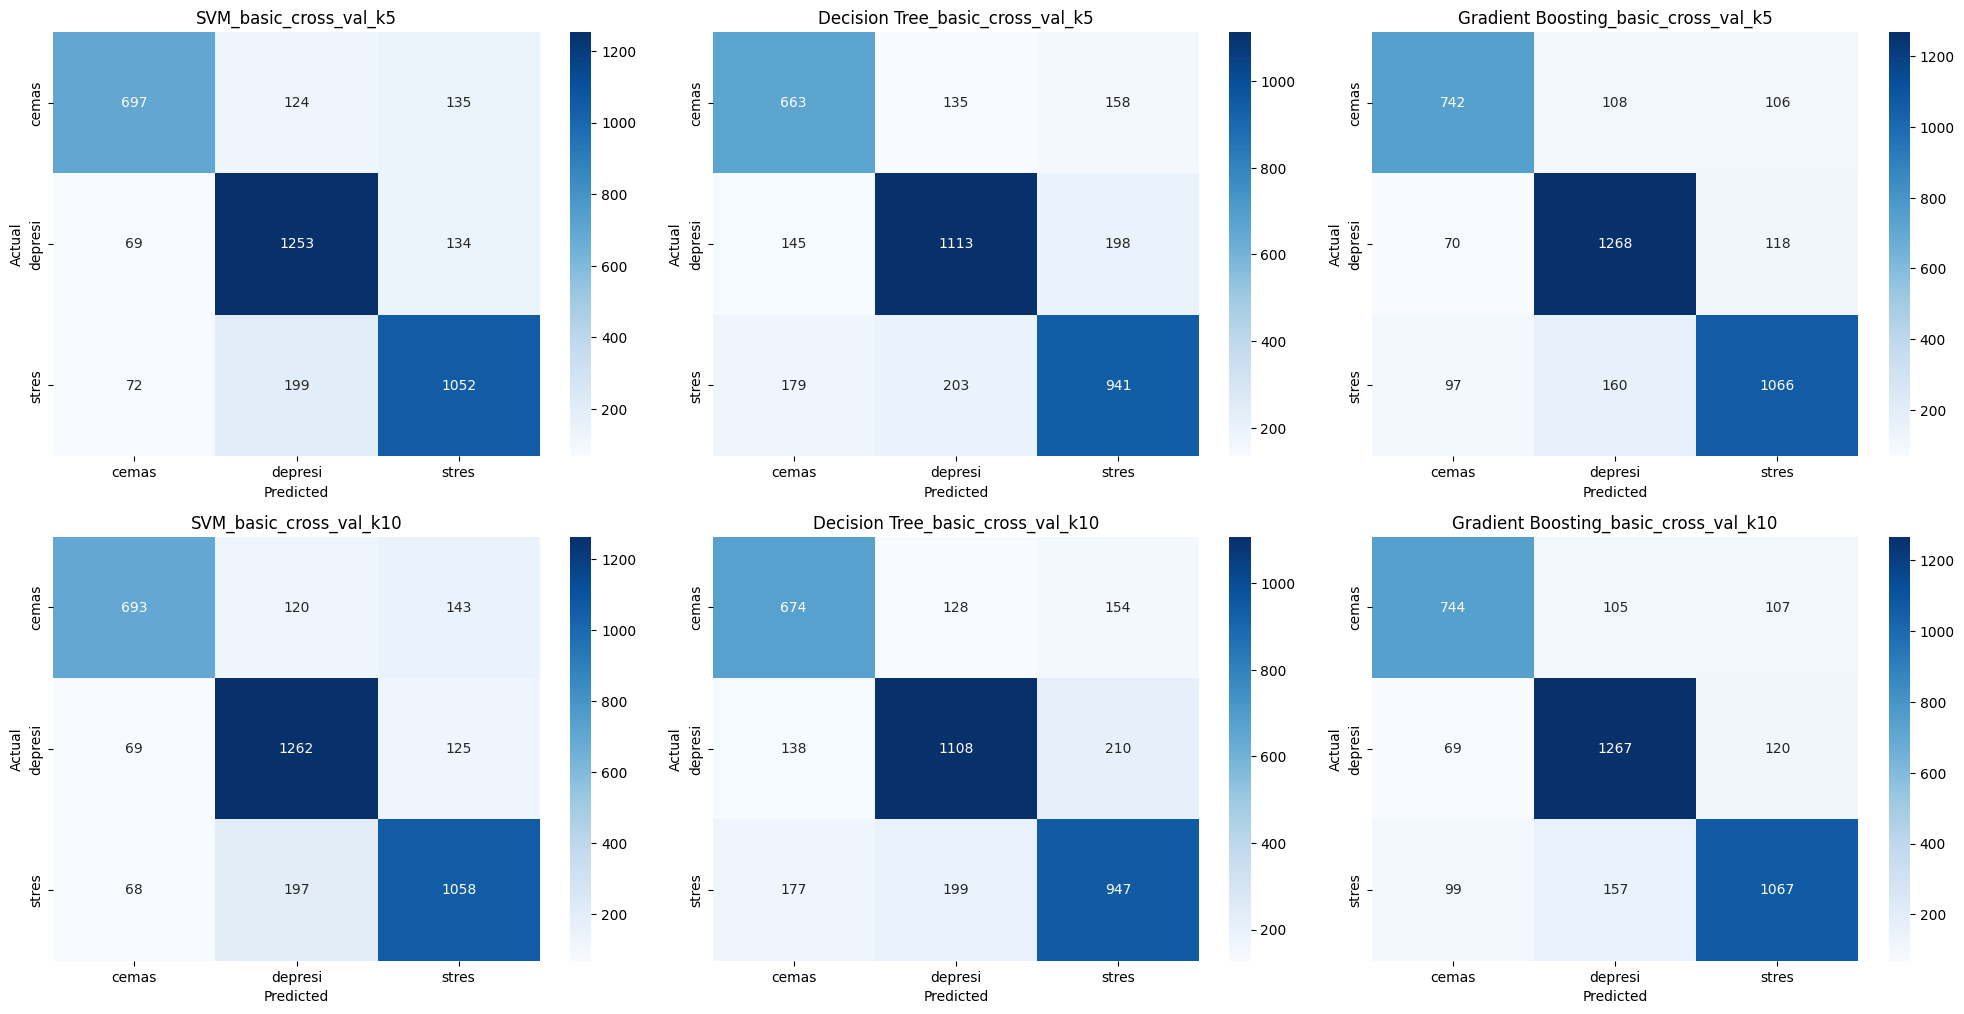

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Known labels
labels = ["cemas", "depresi", "stres"]

# Set the figure size
plt.rcParams['figure.figsize'] = [20, 30]

# Create subplots for each confusion matrix
for i, (key, value) in enumerate(results.items()):
    # if i >= 20:  # Limit to 20 subplots (5 rows x 4 columns)
    #     break
    cm = np.array(value['confusion_matrix'])
    plt.subplot(6, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(key)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.axis("on")

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Known labels
labels = ["cemas", "depresi", "stres"]

# Initialize an empty DataFrame to store all confusion matrices
df_cm_combined = pd.DataFrame()

# Loop through each model and its confusion matrix in the results
for key, value in results.items():
    # Extract the confusion matrix
    cm = np.array(value['confusion_matrix'])

    # Create a DataFrame from the confusion matrix
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    # Insert the model name into the first column, with only the first row showing the model name
    df_cm.insert(0, 'Model', [key] + [''] * (len(labels) - 1))

    # Concatenate this confusion matrix DataFrame with the combined DataFrame
    df_cm_combined = pd.concat([df_cm_combined, df_cm])

# Display the combined DataFrame
df_cm_combined

,Model,cemas,depresi,stres
cemas,SVM_basic_cross_val_k5,697,124,135
depresi,,69,1253,134
stres,,72,199,1052
cemas,Decision Tree_basic_cross_val_k5,663,135,158
depresi,,145,1113,198
stres,,179,203,941
cemas,Gradient Boosting_basic_cross_val_k5,742,108,106
depresi,,70,1268,118
stres,,97,160,1066
cemas,SVM_basic_cross_val_k10,693,120,143


### Evaluasi kinerja model

In [ ]:
# Inisialisasi list untuk menyimpan data
data = []

# Ekstrak split dan model dari keys di results
for key, value in results.items():
    model_name, split_info = key.split(f'_k')
    split_ratio = split_info.replace('cross_val_', '')
    accuracy = value['accuracy']

    # Tambahkan data ke dalam list
    data.append([split_ratio, model_name, accuracy])

# Konversi list ke DataFrame
accuracy_table = pd.DataFrame(data, columns=['K-Fold', 'Model', 'Accuracy'])

# Pivot DataFrame agar model menjadi kolom
accuracy_table = accuracy_table.pivot(index='K-Fold', columns='Model', values='Accuracy')

# Rename columns to remove the extra text
accuracy_table.columns = accuracy_table.columns.str.replace('_basic_cross_val', '')

# Atur ulang kolom sesuai urutan yang diinginkan
accuracy_table = accuracy_table[['SVM', 'Decision Tree', 'Gradient Boosting']]

# Tampilkan tabel akurasi
accuracy_table

Model,SVM,Decision Tree,Gradient Boosting
K-Fold,,,
10,0.806693,0.730656,0.824096
5,0.803748,0.727443,0.823561


In [ ]:
# Initialize an empty list to store data for the DataFrame
data = []

# Extracting data for each model and split
for experiment_name, result in results.items():
    for label, metrics in result['classification_report'].items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip overall metrics
            row = {
                'Experiment': experiment_name,
                'Label': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            }
            data.append(row)

# Create DataFrame from the data list
df_results = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df_results

,Experiment,Label,Precision,Recall,F1-Score,Support
0,SVM_basic_cross_val_k5,cemas,0.831742,0.729079,0.777035,956.0
1,SVM_basic_cross_val_k5,depresi,0.795051,0.860577,0.826517,1456.0
2,SVM_basic_cross_val_k5,stres,0.796366,0.795163,0.795764,1323.0
3,Decision Tree_basic_cross_val_k5,cemas,0.671733,0.693515,0.682450,956.0
4,Decision Tree_basic_cross_val_k5,depresi,0.767057,0.764423,0.765738,1456.0
5,Decision Tree_basic_cross_val_k5,stres,0.725520,0.711262,0.718321,1323.0
6,Gradient Boosting_basic_cross_val_k5,cemas,0.816282,0.776151,0.795710,956.0
7,Gradient Boosting_basic_cross_val_k5,depresi,0.825521,0.870879,0.847594,1456.0
8,Gradient Boosting_basic_cross_val_k5,stres,0.826357,0.805745,0.815920,1323.0
9,SVM_basic_cross_val_k10,cemas,0.834940,0.724895,0.776036,956.0


In [ ]:
# Group by 'Experiment' and calculate the mean of only the numeric columns
df_overall_result = df_results.groupby('Experiment')[['Precision', 'Recall', 'F1-Score']].mean().reset_index()

# Display the overall result DataFrame
df_overall_result

,Experiment,Precision,Recall,F1-Score
0,Decision Tree_basic_cross_val_k10,0.725324,0.727269,0.726211
1,Decision Tree_basic_cross_val_k5,0.721437,0.723067,0.722169
2,Gradient Boosting_basic_cross_val_k10,0.823004,0.818312,0.820308
3,Gradient Boosting_basic_cross_val_k5,0.822720,0.817591,0.819741
4,SVM_basic_cross_val_k10,0.810689,0.797117,0.802153
5,SVM_basic_cross_val_k5,0.807720,0.794940,0.799772


## Simpan dataframe ke excell

In [ ]:
# Initialize a Pandas Excel writer

with pd.ExcelWriter(excel_path, engine='openpyxl', mode='a') as writer:
    # Save the accuracy table from split validation
    accuracy_table.to_excel(writer, sheet_name='CV Accuracy')

    # Save the combined confusion matrix DataFrame from split validation
    df_cm_combined.to_excel(writer, sheet_name='CV Confusion Matrix')

    # Save the df_results DataFrame from split validation
    df_results.to_excel(writer, sheet_name='CV Result')

    # Save the overall results DataFrame from split validation
    df_overall_result.to_excel(writer, sheet_name='CV Overall Result')